In [1]:
# The following code is a classification neural network

# Import all packages and libraries for NN

# from numpy.random import seed
# seed(1)
# from tensorflow import set_random_seed
# set_random_seed(2)

from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense
from sklearn.utils import shuffle
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from numpy import argmax
from keras.utils import to_categorical
from matplotlib import pyplot

import numpy
import keras
import pandas
import collections


Using TensorFlow backend.


In [2]:
# Data Processing
# Preparing Iris dataset for usage as a dataframe
# Encoding output variables
# Shuffle rows randomly for variety
# Spliting dataset to test and train dataframes. Test dataset will be 80% of entire dataframe.
# Parsing dataframe to features and labels (x_train and y_train)

# Constants
_training_split = 0.8


# Spliting dataframe to training and testing
def split_to_training(dataframe):
    train_df = dataframe[:int(len(dataframe)*_training_split)]
    
    return train_df


def split_to_testing(dataframe):
    test_df = dataframe[int(len(dataframe)*_training_split):]
    
    return test_df


# Spliting training or testing dataset to x and y
def split_to_x(dataframe):
    x = dataframe[features].values
    
    return x


def split_to_y(dataframe):
    y = dataframe[labels].values
    
    return y


# Encoding all labels with HOT Encoder
def encode_dataframe(label_y):
    encoder = LabelEncoder()
    encoder.fit(label_y)
    encoded_Y = encoder.transform(label_y)
    new_y = np_utils.to_categorical(encoded_Y)
    
    return new_y


def prep_data(df):
    pass
    
# Load in dataset
dataframe = pandas.read_csv('iris.csv')
df = shuffle(dataframe)
features = list(df.columns.values)[:-1]
labels = list(df.columns.values)[-1]
input_dim = len(list(df.columns.values)[:-1])

train_df = split_to_training(df)
x_train = split_to_x(train_df)
y_train = encode_dataframe(split_to_y(train_df))

test_df = split_to_testing(df)
x_test = split_to_x(test_df)
y_test = encode_dataframe(split_to_y(test_df))



In [3]:
class KerasNeuralNetwork:
    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        
        
    def run(self):
        _number_of_test_models = 5
        
        base_number_layers = int(input_dim**.5)
#       group_models { loss_value: respective model {}
        group_models = {}

        list_of_history = []
        for i in range(_number_of_test_models):
            model = Sequential()
            
            # Base number of layers
            model.add(Dense(input_dim, input_dim=input_dim, activation='sigmoid'))
            
            # Loop adds an extra hidden layer after each individual model is trained
            for i in range(base_number_layers):
                model.add(Dense(4, activation='sigmoid'))
            model.add(Dense(3, activation='sigmoid'))
            model.summary()
        
            model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
            history = model.fit(self.x_train, self.y_train, epochs=10, validation_split=0.2)                 
            scores = model.evaluate(self.x_test, self.y_test)
            
            
            # Map each loss with its respective model
            # Note that group_models[0] = 'model object' and group_models[1] = the'history object'
            group_models[scores[0]] = model, history
                                    
            pyplot.plot(history.history['loss'])
            pyplot.plot(history.history['val_loss'])
            pyplot.title('Loss After Each Epoch')
            pyplot.ylabel('loss')
            pyplot.xlabel('epoch')
            
            scores = model.evaluate(self.x_test, self.y_test)
            print("{}: {}".format(model.metrics_names[0], scores[0]))
            print("{}: {}%".format(model.metrics_names[1], scores[1]*100))
            base_number_layers += 1
        
        pyplot.legend(['2HL','val_2HL','3HL','val_3HL','4HL','val_4HL','5HL',
                       'val_5HL','6HL','val_6HL','7HL','val_7HL','8HL','val_8HL'], loc='upper right')
        pyplot.show()
        
        # sort the dictionary
        ordered_group_models = collections.OrderedDict(sorted(group_models.items()))
        
        
        # Use models starting from the lowest loss. If it is overfitted, take the second lowest loss and so on.
        # for i, v in ordered_group_models.items():
        # overfitted = False
        
        overfitted = False
        for key, value in ordered_group_models.items():
            list_of_loss = value[1].history['loss']
            list_of_val_loss = value[1].history['val_loss']
            
            for i in range(0, len(list_of_loss)):
                if list_of_loss[i] < list_of_val_loss[i]:
                    overfitted = True
                    break # the model is overfitted
                    
            if overfitted is False:
                optimized_model = value[0]
                optimized_history = value[1]
                break # exit loop because we have found optimized model
                
            overfitted = False
            
                
        # Evaluating the optimized model
        scores = optimized_model.evaluate(self.x_test, self.y_test)
        print("{}: {}".format(optimized_model.metrics_names[0], scores[0]))
        print("{}: {}%".format(optimized_model.metrics_names[1], scores[1]*100))

                
        pyplot.plot(optimized_history.history['loss'])
        pyplot.plot(optimized_history.history['val_loss'])
        pyplot.title('Loss and Val_Loss vs Epoch')
        pyplot.ylabel('loss')
        pyplot.xlabel('epoch')
        pyplot.legend(['Loss','Val_Loss'], loc='upper right')
        pyplot.show()
        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 15        
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________
Train on 96 samples, validate on 24 samples
Epoch 1/10
96/96 [==============================] - 0s 5ms/step - loss: 0.5067 - acc: 0.3125 - val_loss: 0.5142 - val_acc: 0.2917
Epoch 2/10
96/96 [==============================] - 0s 109us/step - loss: 0.5058 - acc: 0.3125 - val_los

Total params: 135
Trainable params: 135
Non-trainable params: 0
_________________________________________________________________
Train on 96 samples, validate on 24 samples
Epoch 1/10
96/96 [==============================] - 1s 9ms/step - loss: 0.5610 - acc: 0.3125 - val_loss: 0.5492 - val_acc: 0.4167
Epoch 2/10
96/96 [==============================] - 0s 140us/step - loss: 0.5602 - acc: 0.3125 - val_loss: 0.5484 - val_acc: 0.4167
Epoch 3/10
96/96 [==============================] - 0s 134us/step - loss: 0.5593 - acc: 0.3125 - val_loss: 0.5475 - val_acc: 0.4167
Epoch 4/10
96/96 [==============================] - 0s 143us/step - loss: 0.5585 - acc: 0.3125 - val_loss: 0.5466 - val_acc: 0.4167
Epoch 5/10
96/96 [==============================] - 0s 178us/step - loss: 0.5576 - acc: 0.3125 - val_loss: 0.5457 - val_acc: 0.4167
Epoch 6/10
96/96 [==============================] - 0s 157us/step - loss: 0.5568 - acc: 0.3125 - val_loss: 0.5448 - val_acc: 0.4167
Epoch 7/10
96/96 [==================

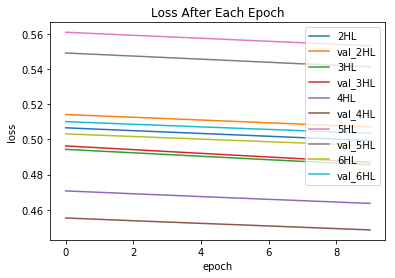

30/30 [==============================] - 0s 47us/step
loss: 0.4565011262893677
acc: 33.33333432674408%


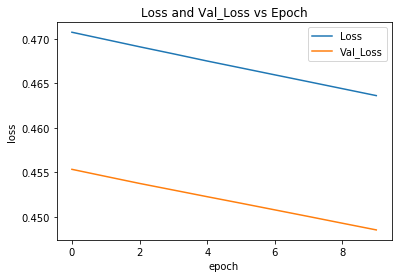

In [4]:
NN = KerasNeuralNetwork(x_train, y_train, x_test, y_test)
NN.run()
